### Library Imports

In [43]:
import numpy as np
import plotly.graph_objects as go
from scipy.integrate import quad

---

# Method 1

In [44]:
# Define the function to be integrated
def f(x):
    return 1 / (2 - np.sqrt(x))

# Integrate the function from 0 to 5
integral_value, _ = quad(f, 0, 5)

# Generate x values for plotting
x = np.linspace(0, 5, 1000)
y = f(x)


c:\Users\AaronSnyder\.virtualenvs\eng_math-tu8MGJB8\lib\site-packages\ipykernel_launcher.py:6: IntegrationWarning:

The integral is probably divergent, or slowly convergent.



### what my computer really means....<br>
![Alt text](image-2.png)
### good thing Gaussian Quadrature is robust <br>
$\int_{a}^{b} f(x) \, dx \approx \sum_{i=1}^{n} w_i \cdot f(x_i)$


In [45]:
# Create the plotly figure
fig = go.Figure()

# Plot the function
fig.add_trace(go.Scatter(x=x, y=y, fill='tozeroy', mode='lines', name='y = 1/(2-√x)'))

# Add title and labels
fig.update_layout(title='Graph of y = 1/(2-√x)',
                  xaxis_title='x',
                  yaxis_title='y')

# Show the figure
fig.show()

In [46]:
# Print the value of the integral
print(f"Value of I from 0 to 5: {integral_value:.5f}")

Value of I from 0 to 5: 4.07499


---

# Method 2

In [47]:
# Define the function to be integrated
def f(x):
    return 1 / (2 - np.sqrt(x))

# Integrate the function from 0 to 3.99 and from 4.01 to 5
integral_value_1, _ = quad(f, 0, 3.99999)
integral_value_2, _ = quad(f, 4.00001, 5)

# Sum the two integrals
total_integral = integral_value_1 + integral_value_2

print(f"Value of I from 0 to 5: {total_integral:.5f}")


Value of I from 0 to 5: 4.07500


# Method 3 

---

c:\Users\AaronSnyder\.virtualenvs\eng_math-tu8MGJB8\lib\site-packages\ipykernel_launcher.py:6: RuntimeWarning:

divide by zero encountered in true_divide



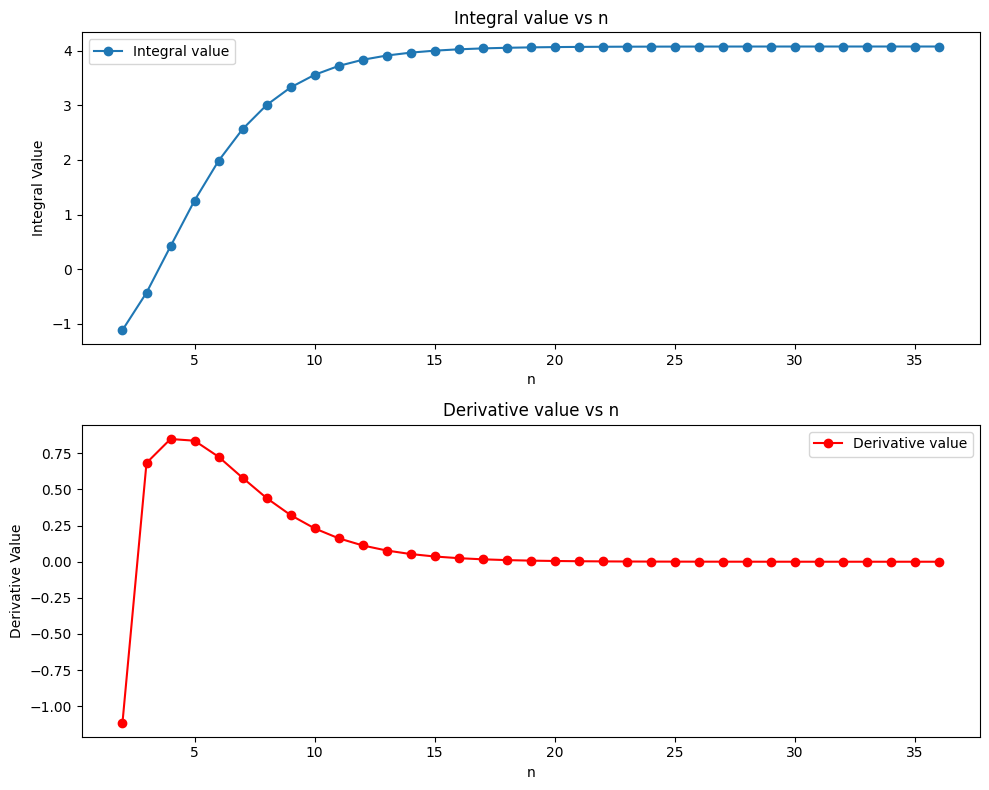

Final value of n: 70
Final integral value: 4.074977224691025


In [48]:
import numpy as np
from scipy.special import roots_legendre
import matplotlib.pyplot as plt

def f(x):
    return 1 / (2 - np.sqrt(x))

def gaussian_quadrature(func, a, b, n_points):
    x, w = roots_legendre(n_points)
    transformed_x = 0.5 * (b - a) * x + 0.5 * (a + b)
    fx = func(transformed_x)
    return 0.5 * (b - a) * np.sum(w * fx)

def adaptive_quadrature(func, a, b, n_points):
    # Split points around the singularity
    split_point1 = 3.99
    split_point2 = 4.01
    
    # Integrate over the three subintervals
    integral1 = gaussian_quadrature(func, a, split_point1, n_points)
    integral2 = gaussian_quadrature(func, split_point1, split_point2, n_points)
    integral3 = gaussian_quadrature(func, split_point2, b, n_points)
    
    # Return the sum of the three integrals
    return integral1 + integral2 + integral3

# Incrementing n and storing results for plotting
integral_values = []
derivatives = []
ns = list(range(2, 102, 1))  # using a step of 10 for n from 2 to 100
prev_integral = 0

for n_points in ns:
    current_integral = adaptive_quadrature(f, 0, 5, n_points)
    
    # Skip if the integral value is infinite
    if np.isinf(current_integral):
        continue

    derivative = current_integral - prev_integral
    integral_values.append(current_integral)
    derivatives.append(derivative)
    
    if abs(derivative) < 1e-5:  # break if the difference is smaller than a threshold
        break
        
    prev_integral = current_integral


# Plotting
fig, axs = plt.subplots(2, 1, figsize=(10, 8))
axs[0].plot(ns[:len(integral_values)], integral_values, '-o', label="Integral value")
axs[0].set_title("Integral value vs n")
axs[0].set_xlabel("n")
axs[0].set_ylabel("Integral Value")
axs[0].legend()

axs[1].plot(ns[:len(derivatives)], derivatives, '-o', color="red", label="Derivative value")
axs[1].set_title("Derivative value vs n")
axs[1].set_xlabel("n")
axs[1].set_ylabel("Derivative Value")
axs[1].legend()

plt.tight_layout()
plt.show()

# Printing the final value of n and the integral value
print(f"Final value of n: {n_points}")
print(f"Final integral value: {current_integral}")

